<a href="https://colab.research.google.com/github/shreyaa0008/BCSE331L-EDA-22BDS0271/blob/main/22BDS0271_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCSE331L – Exploratory Data Analysis (EDA)
**Name:** Shreya Singh
**Registration no.** : 22BDS0271  
**Dataset:** PhD Publications – https://raw.githubusercontent.com/salemprakash/EDA/main/Data/PhDPublications.csv  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Load dataset
DATA_URL = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/PhDPublications.csv"
df = pd.read_csv(DATA_URL)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB


In [ ]:
# Dimensions
print("Shape:", df.shape)
df.describe(include='all')
df.info()


Shape: (915, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  915 non-null    int64  
 1   articles  915 non-null    int64  
 2   gender    915 non-null    object 
 3   married   915 non-null    object 
 4   kids      915 non-null    int64  
 5   prestige  915 non-null    float64
 6   mentor    915 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.2+ KB


In [ ]:
# Summary statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownames,915.0,NaN,NaN,NaN,458.0,264.282046,1.0,229.5,458.0,686.5,915.0
articles,915.0,NaN,NaN,NaN,1.692896,1.926069,0.0,0.0,1.0,2.0,19.0
gender,915,2,male,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,915,2,yes,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids,915.0,NaN,NaN,NaN,0.495082,0.76488,0.0,0.0,0.0,1.0,3.0
prestige,915.0,NaN,NaN,NaN,3.103109,0.984249,0.755,2.26,3.15,3.92,4.62
mentor,915.0,NaN,NaN,NaN,8.767213,9.483916,0.0,3.0,6.0,12.0,77.0


In [ ]:
# Data Cleaning example
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.drop_duplicates()
df.isna().sum()

,0
rownames,0
articles,0
gender,0
married,0
kids,0
prestige,0
mentor,0


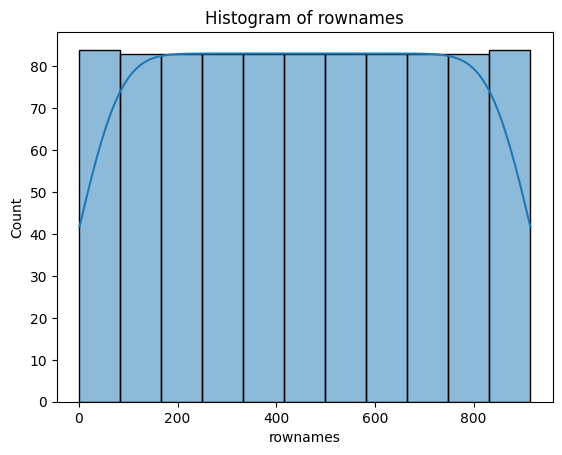

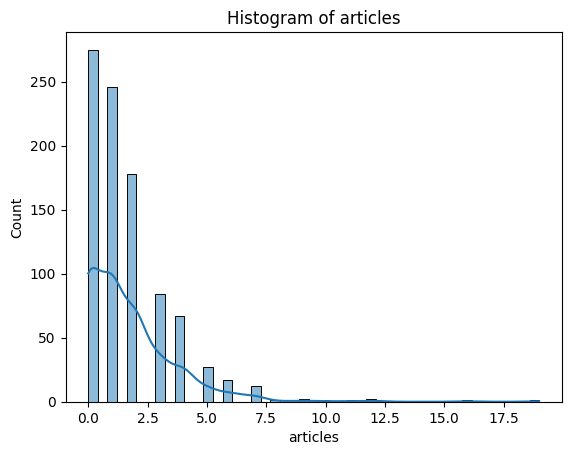

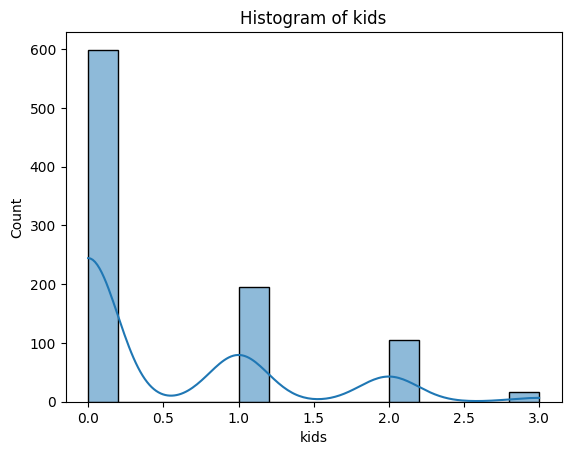

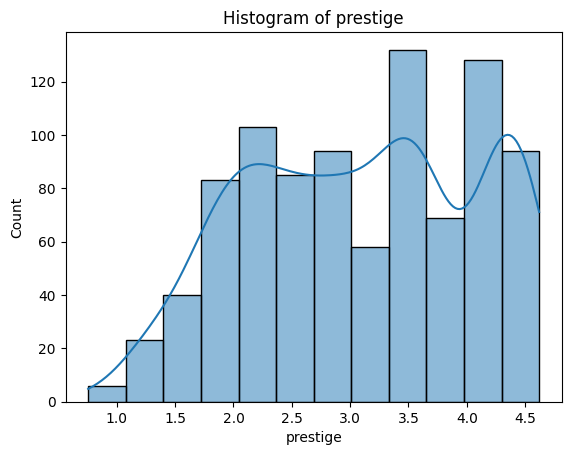

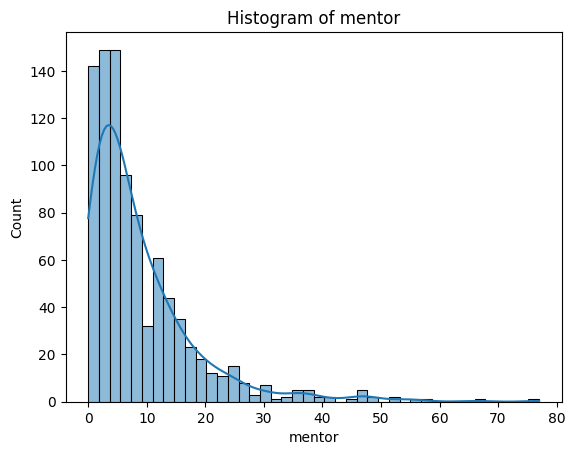

In [ ]:
# Univariate Analysis
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

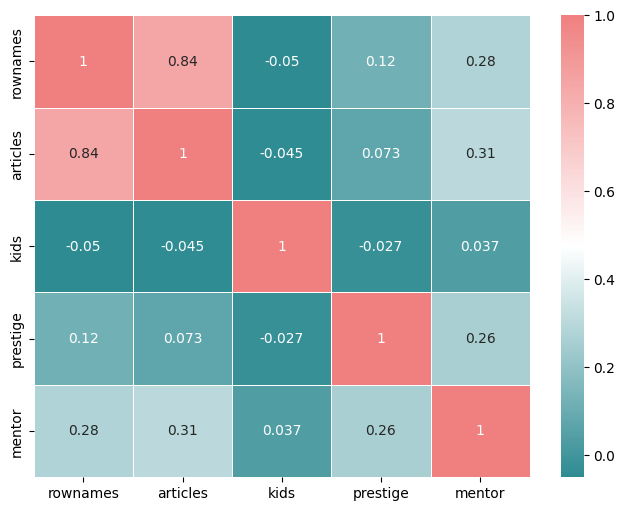

In [ ]:
# Bivariate Analysis (Correlation heatmap)
new_cmap = LinearSegmentedColormap.from_list(
    "new_cmap",
    ["#2E8B92", "#FFFFFF", "#F08080"]
)

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=new_cmap, linewidths=0.5)
plt.show()

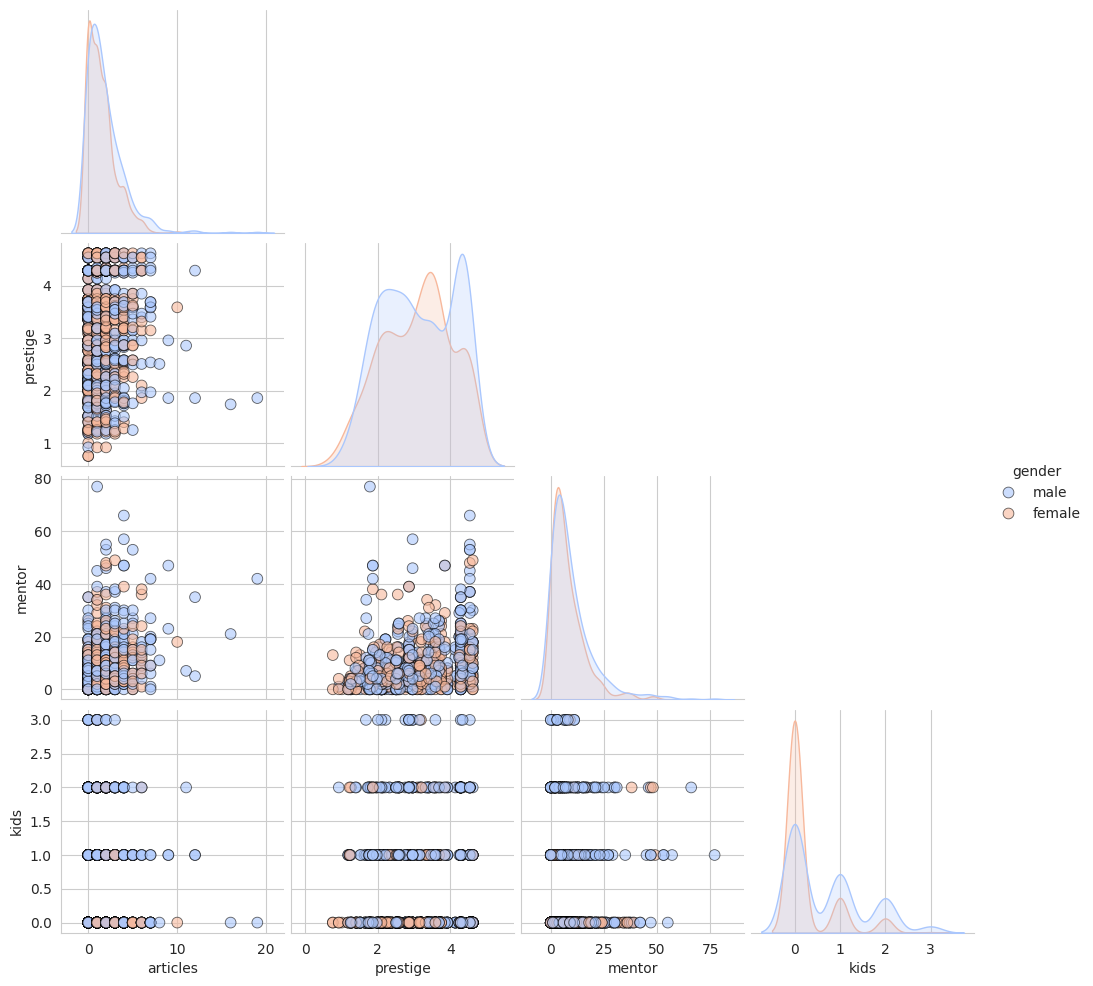

In [ ]:
#Multivariate analysis - Pair Plot
sns.set_style("whitegrid")
sns.pairplot(
    df[['articles', 'prestige', 'mentor', 'kids', 'gender']],
    diag_kind="kde",
    corner=True,
    hue="gender",           # color by category
    palette="coolwarm",
    plot_kws={
        "alpha": 0.6,
        "s": 60,
        "edgecolor": "k"
    }
)
plt.show()

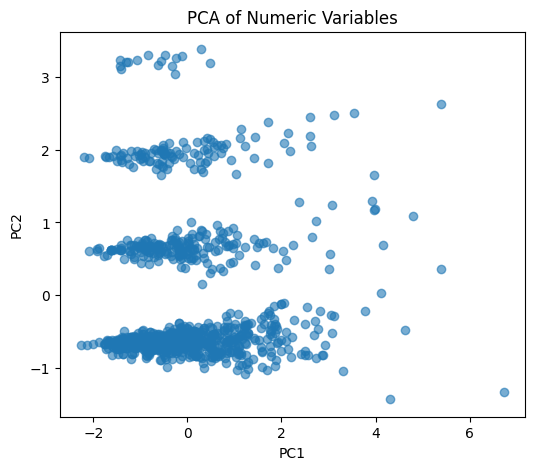

In [ ]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df[['articles','prestige','mentor','kids']])
pca_res = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(pca_res[:,0], pca_res[:,1], alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA of Numeric Variables')
plt.show()

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
df = df.copy()
df.columns = [c.strip() for c in df.columns]
df['articles'] = pd.to_numeric(df['articles'], errors='coerce')
df['prestige'] = pd.to_numeric(df['prestige'], errors='coerce')
df['mentor'] = pd.to_numeric(df['mentor'], errors='coerce')
df['kids'] = pd.to_numeric(df['kids'], errors='coerce')
df['gender'] = df['gender'].astype('category')
df['married'] = df['married'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   rownames  915 non-null    int64   
 1   articles  915 non-null    int64   
 2   gender    915 non-null    category
 3   married   915 non-null    category
 4   kids      915 non-null    int64   
 5   prestige  915 non-null    float64 
 6   mentor    915 non-null    int64   
dtypes: category(2), float64(1), int64(4)
memory usage: 37.9 KB


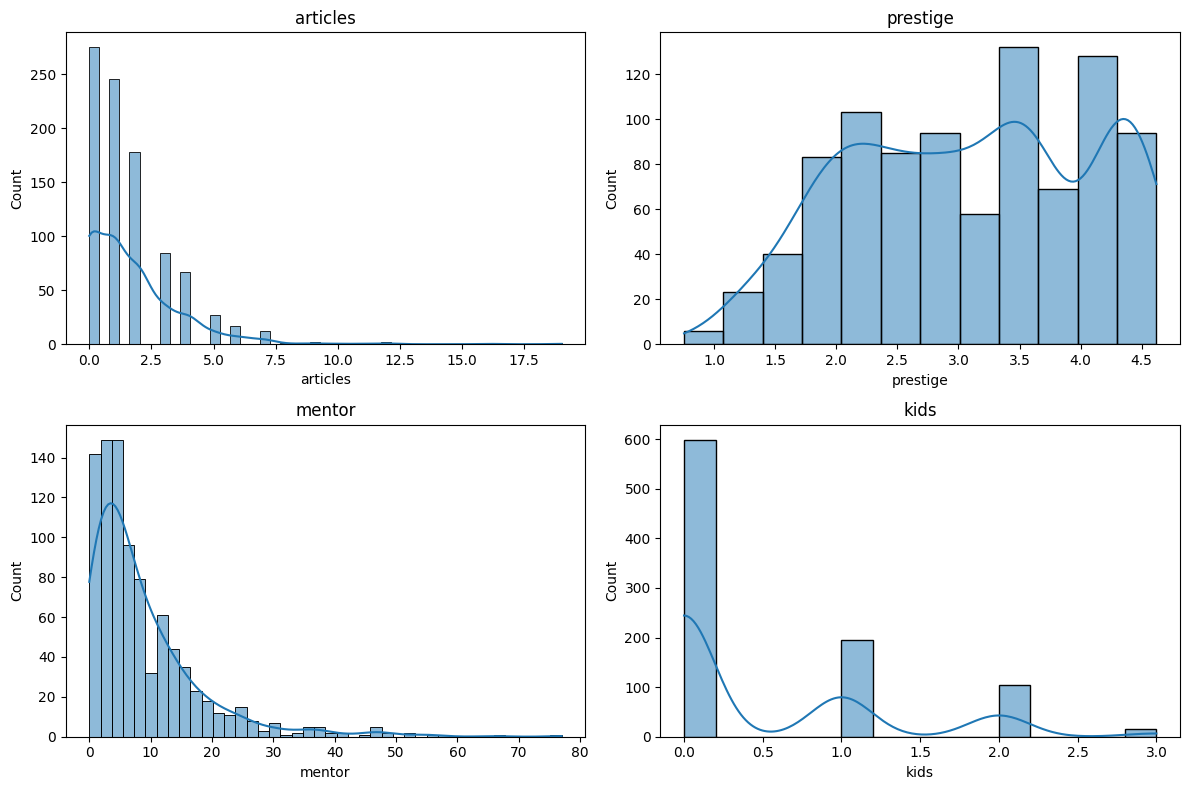

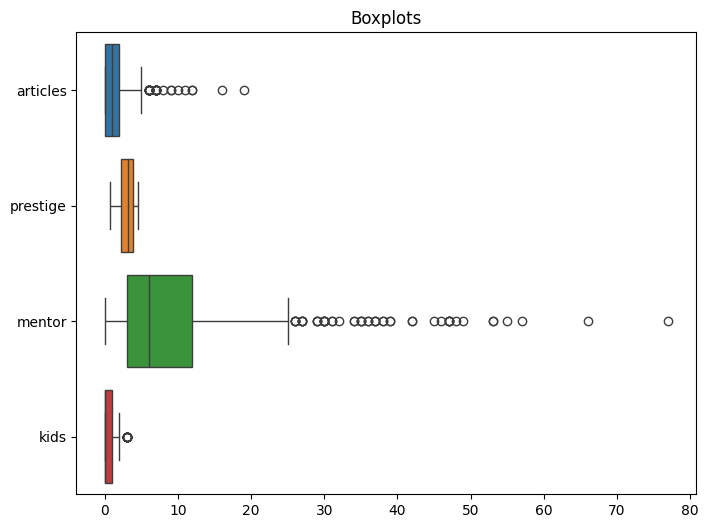

In [5]:
num_cols = ['articles','prestige','mentor','kids']
plt.figure(figsize=(12,8))
for i,c in enumerate(num_cols,1):
    plt.subplot(2,2,i)
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(c)
plt.tight_layout()

plt.figure(figsize=(8,6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title('Boxplots')
plt.show()

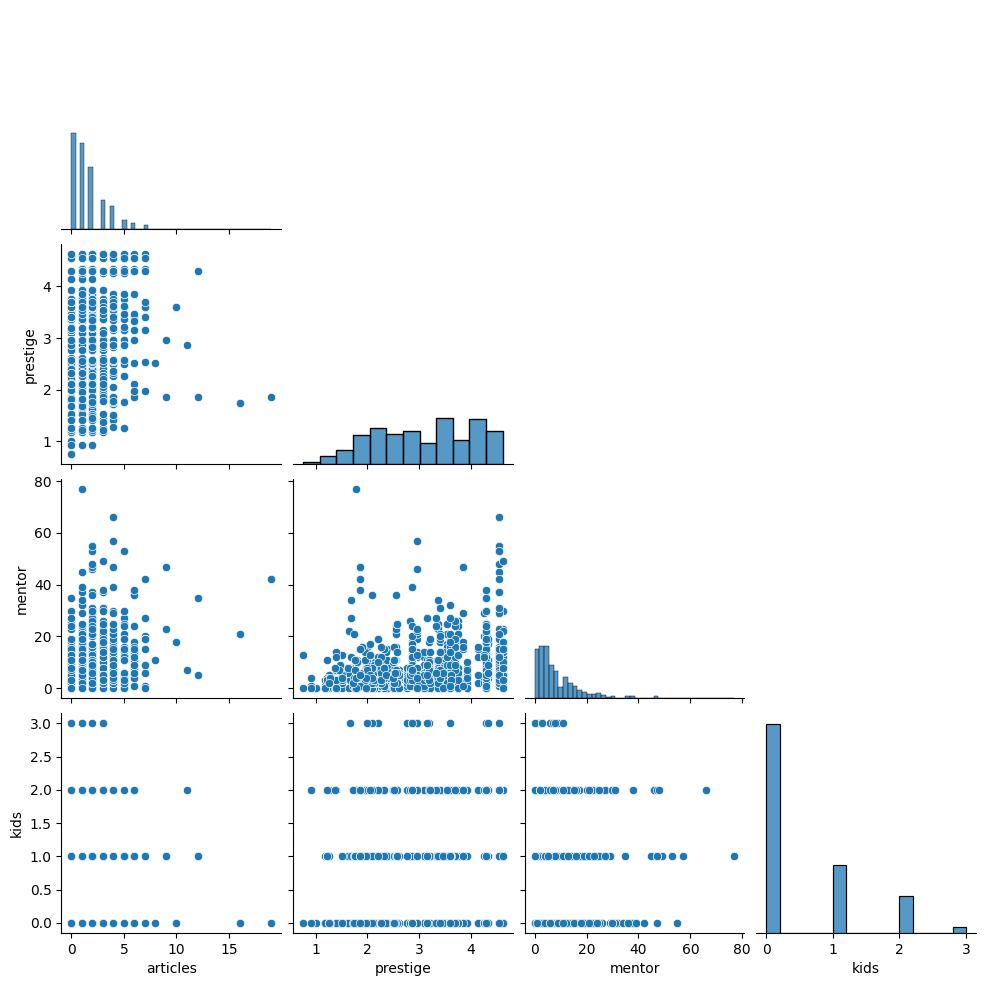

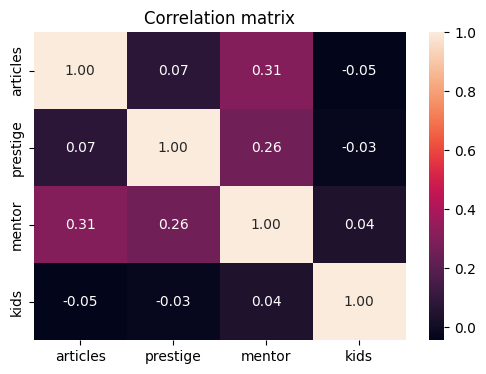

In [6]:
sns.pairplot(df[num_cols].dropna(), corner=True)
plt.show()

corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [7]:
ct_gender_married = pd.crosstab(df['gender'], df['married'])
ct_gender_married

married,no,yes
gender,,
female,196,225
male,113,381


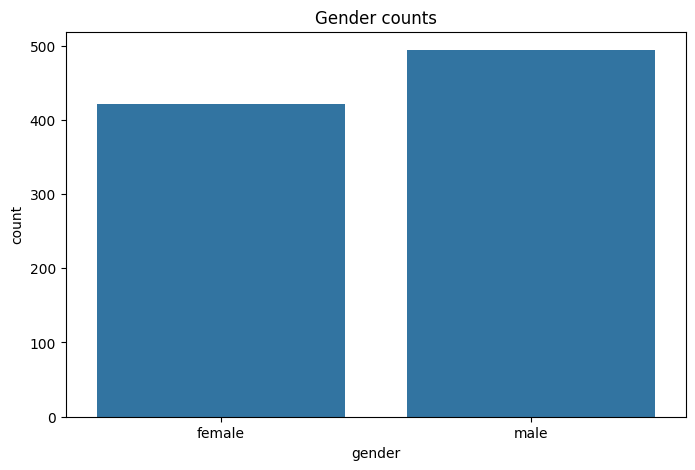

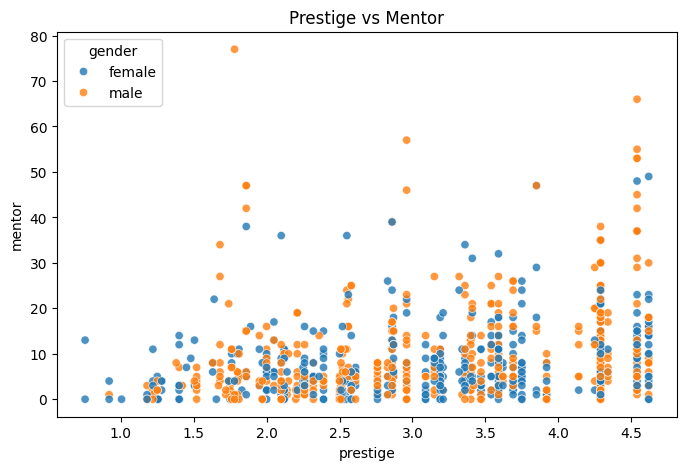

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=df)
plt.title('Gender counts')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='prestige', y='mentor', hue='gender', data=df, alpha=0.8)
plt.title('Prestige vs Mentor')
plt.show()

/tmp/ipython-input-3558675735.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range(end=pd.Timestamp.today(), periods=120, freq='M')
/tmp/ipython-input-3558675735.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ts_q = ts.resample('Q').mean()


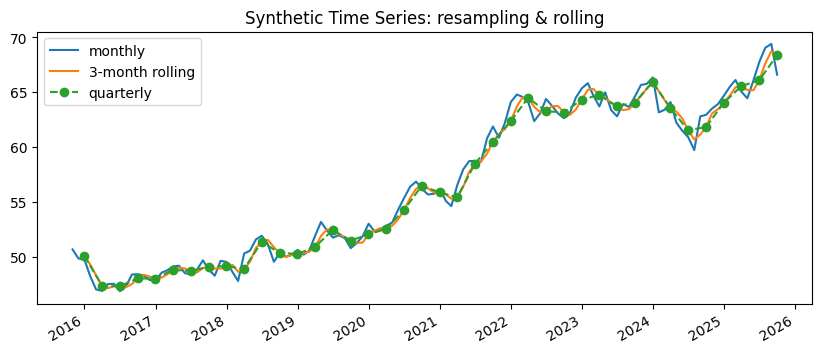

In [10]:
rng = pd.date_range(end=pd.Timestamp.today(), periods=120, freq='M')
ts = pd.Series(np.cumsum(np.random.randn(len(rng))) + 50, index=rng, name='synthetic_metric')
ts.head()

# resample to quarterly, monthly rolling mean example
ts_q = ts.resample('Q').mean()
ts_m_rolling = ts.rolling(window=3).mean()

plt.figure(figsize=(10,4))
ts.plot(label='monthly')
ts_m_rolling.plot(label='3-month rolling')
ts_q.plot(label='quarterly', linestyle='--', marker='o')
plt.legend()
plt.title('Synthetic Time Series: resampling & rolling')
plt.show()

/tmp/ipython-input-3494494753.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': np.tile(pd.date_range('2020-01-01', periods=36, freq='M'), len(groups)),
/tmp/ipython-input-3494494753.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sub['value'].resample('Q').mean().plot(label=g)
/tmp/ipython-input-3494494753.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sub['value'].resample('Q').mean().plot(label=g)
/tmp/ipython-input-3494494753.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sub['value'].resample('Q').mean().plot(label=g)


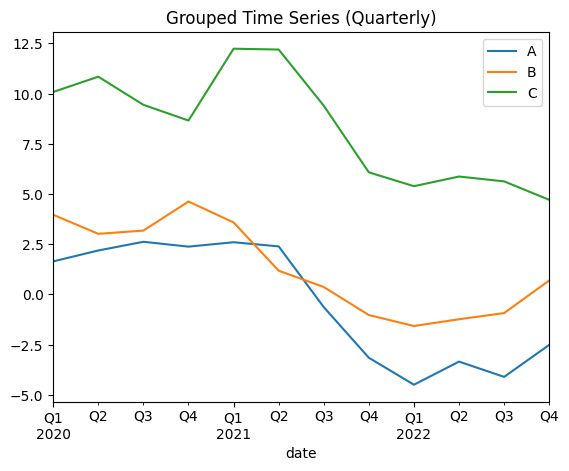

In [11]:
groups = ['A','B','C']
df_ts = pd.DataFrame({
    'date': np.tile(pd.date_range('2020-01-01', periods=36, freq='M'), len(groups)),
    'group': np.repeat(groups, 36),
    'value': np.hstack([np.cumsum(np.random.randn(36))+i*5 for i in range(len(groups))])
})
df_ts['date'] = pd.to_datetime(df_ts['date'])
df_ts.set_index('date', inplace=True)
for g, sub in df_ts.groupby('group'):
    sub['value'].resample('Q').mean().plot(label=g)
plt.legend(); plt.title('Grouped Time Series (Quarterly)')
plt.show()

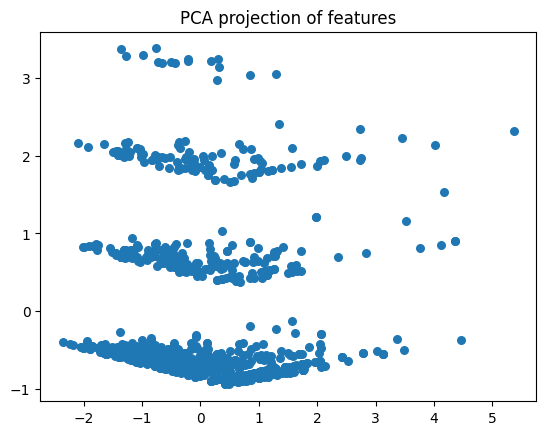

In [12]:
X = df[['prestige','mentor','kids']].fillna(0).values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
pca = PCA(n_components=2)
Xp = pca.fit_transform(Xs)
plt.scatter(Xp[:,0], Xp[:,1], s=30)
plt.title('PCA projection of features')
plt.show()

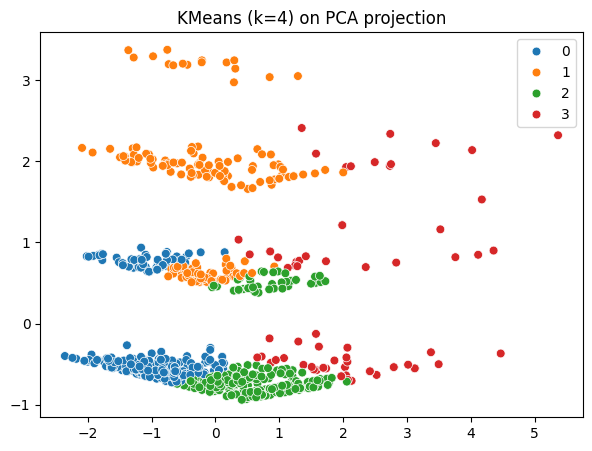

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Xs)
labels_k = kmeans.labels_
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=labels_k, palette='tab10', s=40)
plt.title('KMeans (k=4) on PCA projection')
plt.show()

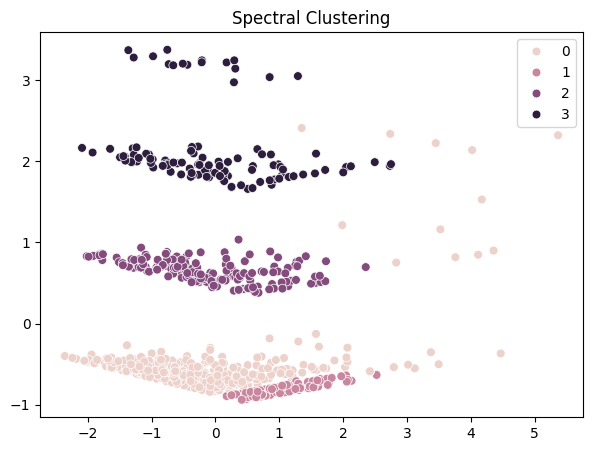

In [14]:
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
labels_sc = sc.fit_predict(Xs)
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=labels_sc, s=40)
plt.title('Spectral Clustering')
plt.show()

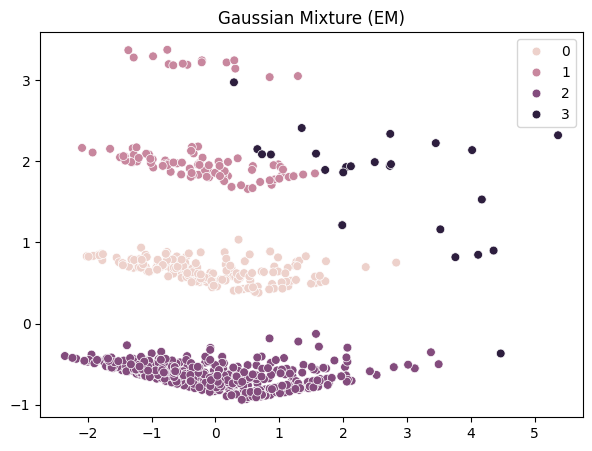

In [15]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
gmm.fit(Xs)
labels_gmm = gmm.predict(Xs)
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=labels_gmm, s=40)
plt.title('Gaussian Mixture (EM)')
plt.show()

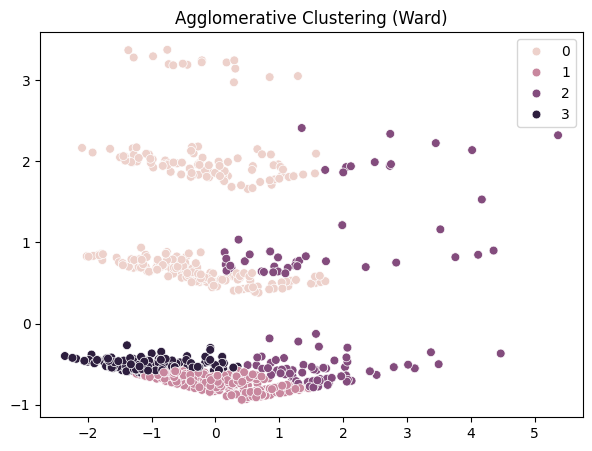

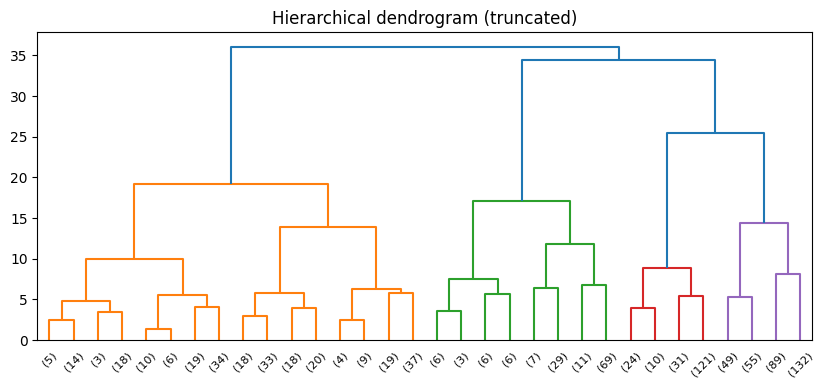

In [16]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg = agg.fit_predict(Xs)
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=labels_agg, s=40)
plt.title('Agglomerative Clustering (Ward)')
plt.show()

Z = linkage(Xs, method='ward')
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=4)
plt.title('Hierarchical dendrogram (truncated)')
plt.show()

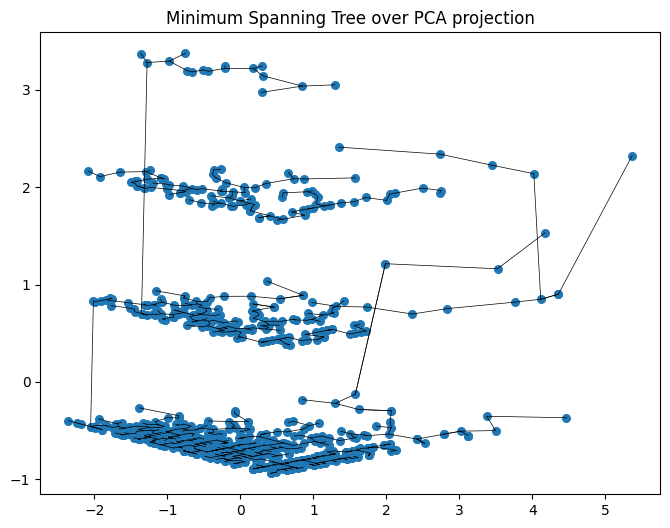

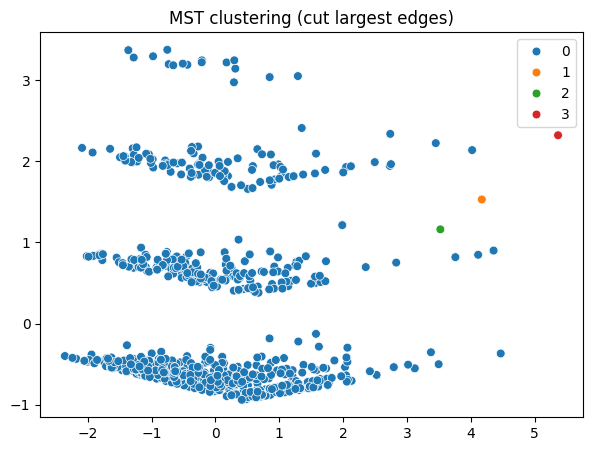

In [17]:
D = pairwise_distances(Xs, metric='euclidean')
mst_sparse = minimum_spanning_tree(D)
mst = mst_sparse.toarray().astype(float)

edges = np.column_stack(np.where(mst > 0))
weights = mst[mst > 0]

plt.figure(figsize=(8,6))
plt.scatter(Xp[:,0], Xp[:,1], s=30)
for (i,j), w in zip(edges, weights):
    plt.plot([Xp[i,0], Xp[j,0]], [Xp[i,1], Xp[j,1]], 'k-', linewidth=0.5)
plt.title('Minimum Spanning Tree over PCA projection')
plt.show()


k = 4

edge_list = list(zip(edges[:,0], edges[:,1], weights))
edge_list_sorted = sorted(edge_list, key=lambda x: x[2], reverse=True)
remove_edges = edge_list_sorted[:k-1]

import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(Xs.shape[0]))
for i,j,w in edge_list:
    if (i,j,w) not in remove_edges:
        G.add_edge(i,j)
components = list(nx.connected_components(G))
mst_labels = np.zeros(Xs.shape[0], dtype=int)
for idx, comp in enumerate(components):
    for node in comp:
        mst_labels[node] = idx
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=mst_labels, palette='tab10', s=40)
plt.title('MST clustering (cut largest edges)')
plt.show()

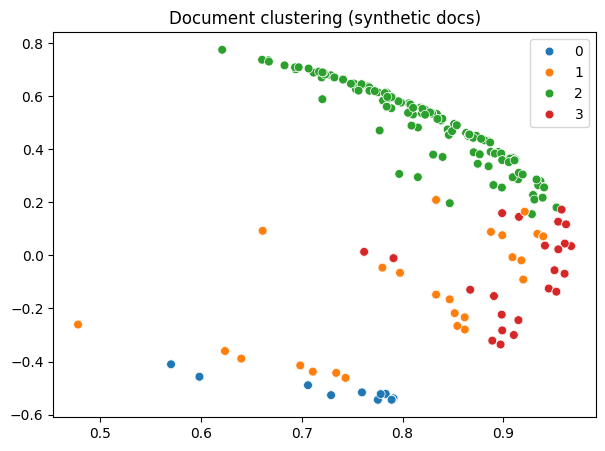

In [18]:
def make_doc(row):
    p = int(np.round(row['prestige']))
    m = int(row['mentor']) if not pd.isna(row['mentor']) else 0
    words = []
    words += ['prestige_high'] * max(0, p)
    words += ['mentor'] * max(0, m//3)
    words += [f"gender_{row['gender']}"]
    words += [f"married_{row['married']}"]
    return " ".join(words)

docs = df.apply(make_doc, axis=1)
vectorizer = TfidfVectorizer()
Xdoc = vectorizer.fit_transform(docs)
k = 4
km_doc = KMeans(n_clusters=k, random_state=0).fit(Xdoc)
labels_doc = km_doc.labels_

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=0)
Xdoc2 = svd.fit_transform(Xdoc)
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xdoc2[:,0], y=Xdoc2[:,1], hue=labels_doc, palette='tab10', s=40)
plt.title('Document clustering (synthetic docs)')
plt.show()

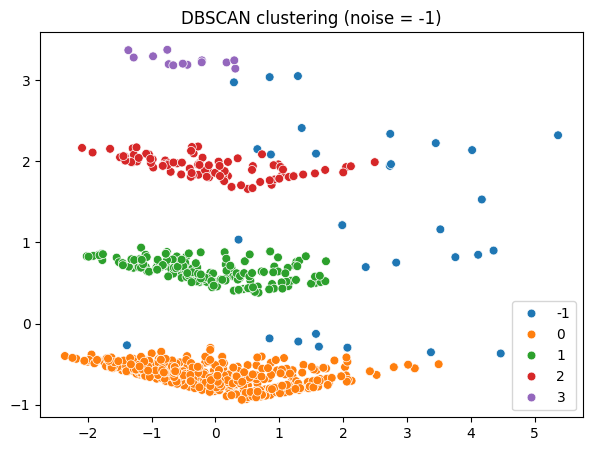

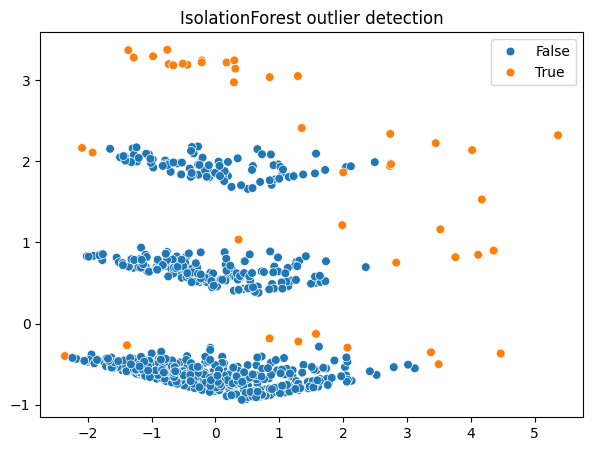

,rownames,articles,gender,married,kids,prestige,mentor,iso_score,iso_outlier
802,803,4,male,yes,2,4.54,66,-0.120586,True
327,328,1,male,yes,1,1.78,77,-0.106979,True
153,154,0,male,yes,3,4.54,11,-0.088212,True
677,678,2,female,yes,2,4.54,48,-0.080054,True
297,298,1,male,yes,3,4.29,0,-0.078435,True
668,669,2,male,no,0,4.54,55,-0.077706,True
798,799,4,male,yes,1,2.96,57,-0.076221,True
741,742,3,female,yes,1,4.62,49,-0.075166,True
871,872,5,male,yes,1,4.54,53,-0.073145,True
546,547,2,male,yes,1,4.54,53,-0.073145,True


In [20]:
db = DBSCAN(eps=0.6, min_samples=5).fit(Xs)
labels_db = db.labels_
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=labels_db, palette='tab10', s=40)
plt.title('DBSCAN clustering (noise = -1)')
plt.show()

iso = IsolationForest(contamination=0.05, random_state=0)
iso_labels = iso.fit_predict(Xs)
outliers = iso_labels == -1
plt.figure(figsize=(7,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=outliers, s=40)
plt.title('IsolationForest outlier detection')
plt.show()


scores = iso.decision_function(Xs)
df_out = df.assign(iso_score=scores, iso_outlier=outliers)
df_out.sort_values('iso_score').head(10)

In [21]:
df2 = df.copy()
df2['kmeans'] = labels_k
df2['spectral'] = labels_sc
df2['gmm'] = labels_gmm
df2['agg'] = labels_agg
df2['mst'] = mst_labels
df2['dbscan'] = labels_db
df2['iso_outlier'] = outliers
df2[['rownames','prestige','mentor','kids','kmeans','spectral','gmm','agg','mst','dbscan','iso_outlier']].head(20)

,rownames,prestige,mentor,kids,kmeans,spectral,gmm,agg,mst,dbscan,iso_outlier
0,1,2.520,7,0,0,0,2,1,0,0,False
1,2,2.050,6,0,0,0,2,3,0,0,False
2,3,3.750,6,0,2,0,2,1,0,0,False
3,4,1.180,3,1,0,2,0,0,0,1,False
4,5,3.750,26,0,3,0,2,2,0,0,False
5,6,3.590,2,2,1,3,1,0,0,2,False
6,7,3.190,3,0,2,0,2,1,0,0,False
7,8,2.960,4,2,1,3,1,0,0,2,False
8,9,4.620,6,0,2,1,2,1,0,0,False
9,10,1.250,0,0,0,0,2,3,0,0,False


In [22]:
df2.to_csv('phd_clustering_results.csv', index=False)
print("Saved phd_clustering_results.csv")

Saved phd_clustering_results.csv
